In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
url = "https://raw.githubusercontent.com/wiflorez/Data-Visualization-tools/master/data/pokemon.csv"
pokemon = pd.read_csv(url)
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


## Bar Charts
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level

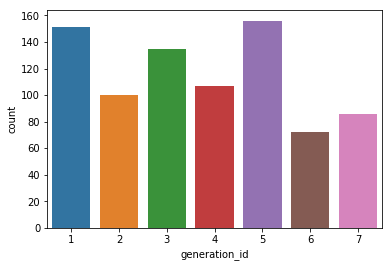

In [3]:
sb.countplot(data = pokemon, x = 'generation_id')

### Changing color palette

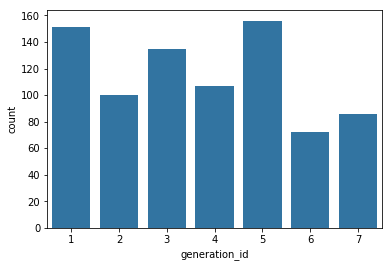

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

For nominal-type data, one common operation is to sort the data in terms of frequency

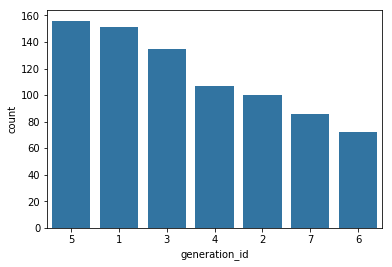

In [5]:
base_color = sb.color_palette()[0]
cat_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = cat_order)

For ordinal-type data, we probably want to sort the bars in order of the variables. While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. 

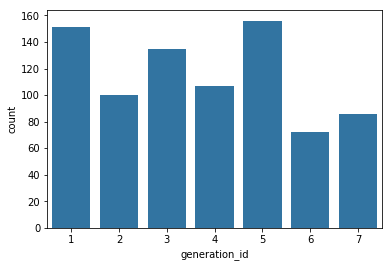

In [6]:
# this method requires pandas v0.21 or later
level_order = [1,2,3,4,5,6,7]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
pokemon['generation_id'] = pokemon['generation_id'].astype(ordered_cat)

# # use this method if you have pandas v0.20.3 or earlier
# df['cat_var'] = df['cat_var'].astype('category', ordered = True,
#                                      categories = level_order)


base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

### Additional Variations

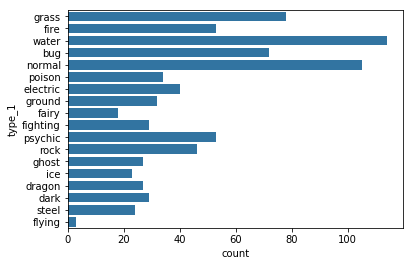

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, y = 'type_1', color = base_color)

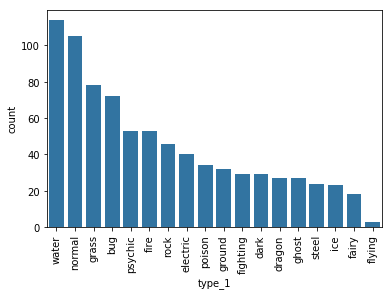

In [8]:
base_color = sb.color_palette()[0]
type_order = pokemon["type_1"].value_counts().index
sb.countplot(data = pokemon, x = 'type_1', color = base_color, order = type_order);
plt.xticks(rotation = 90);

## Absolute vs. Relative Frequency
By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

Text(0, 0.5, 'proportion')

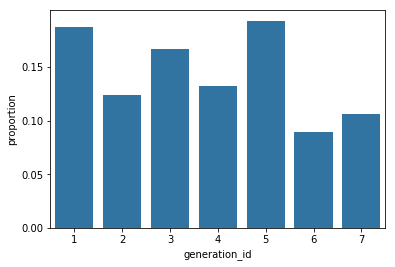

In [9]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = pokemon.shape[0]
max_count = pokemon['generation_id'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ylabel call to make it clear that we're no longer working with straight counts.

### Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

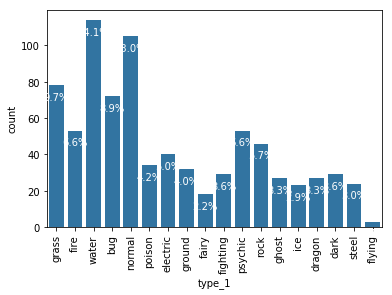

In [10]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'type_1', color = base_color)

# add annotations
n_points = pokemon.shape[0]
cat_counts = pokemon['type_1'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')


Use the `.get_text()` method to obtain the category name, so I can get the count of each category level. At the end, I use the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

### Counting Missing Data

We can use pandas functions to create a table with the number of missing values in each column.

In [11]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

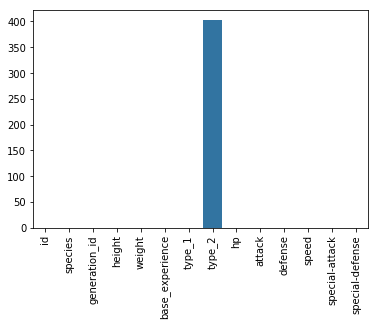

In [12]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);

The first argument to the function contains the x-values (column names), the second argument the y-values (our counts).

## Pie Charts
Pie charts are a fairly limited plot type in the range of scenario

follow certain guidelines:
    - Make sure that your interest is in **relative frequencies** . Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
    - Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
    - Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

### Pie plot

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

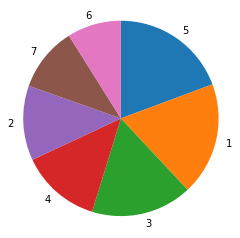

In [13]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)
plt.axis('square')

### Donut Plot

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

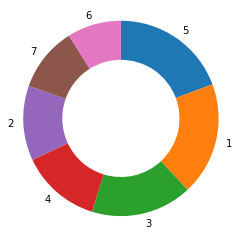

In [14]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width': 0.4})
plt.axis('square')

### Histograms
A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

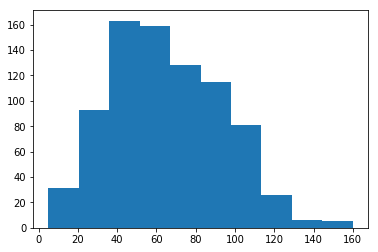

In [15]:
plt.hist(data = pokemon, x = 'speed')

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. 

Use of descriptive statistics (e.g. via ```df['num_var'].describe()```) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function.

(array([ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         1.,  0., 11.,  0.,  0.,  0.,  0., 13.,  0.,  1.,  4.,  1., 10.,
         0.,  1.,  4.,  3., 33.,  2.,  5.,  2.,  1., 26.,  6.,  2.,  3.,
         1., 36.,  2.,  8.,  8.,  3., 34.,  3.,  2.,  6.,  1., 45.,  3.,
         5.,  0.,  0., 29.,  4.,  4.,  8.,  3., 49.,  3.,  2.,  3.,  5.,
        40.,  4.,  4.,  6.,  1., 37.,  5.,  5.,  3.,  3., 15.,  3.,  3.,
         3.,  3., 33.,  3.,  1.,  4.,  4., 29.,  0.,  1.,  1.,  1., 29.,
         4.,  3.,  3.,  0., 27.,  2.,  7.,  3.,  3., 24.,  6.,  2.,  2.,
         2., 10.,  2.,  1.,  6.,  3., 11.,  2.,  3.,  1.,  1.,  8.,  2.,
         1.,  1.,  0.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  0.,  0.,  0.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15

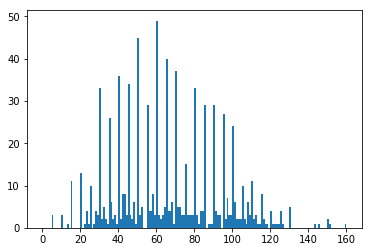

In [16]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

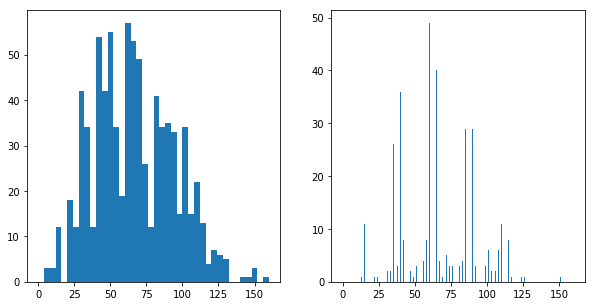

In [17]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

### Alternative Approach
The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


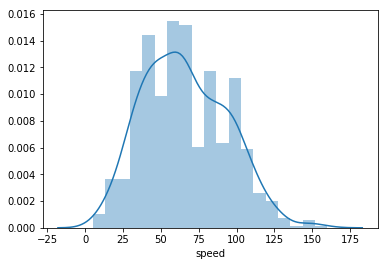

In [18]:
sb.distplot(pokemon['speed']);

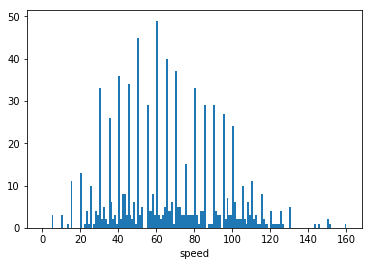

In [19]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

### Figures, Axes, and Subplots
The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

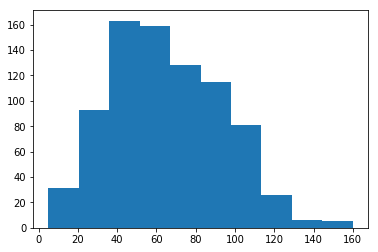

In [27]:
plt.hist(data = pokemon, x = 'speed')

One alternative way we could have created the histogram is to explicitly set up the Figure and Axes.

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

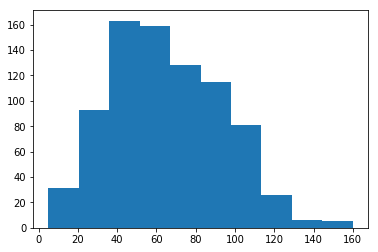

In [28]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = pokemon, x = 'speed')

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

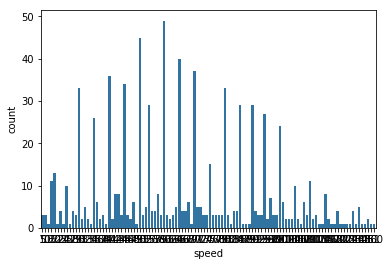

In [29]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x='speed', color = base_color, ax = ax)

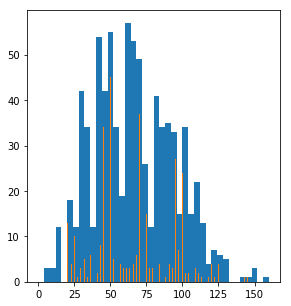

In [30]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

# example of somewhat too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

### Aditional techniques

If you don't assign Axes objects as they're created, you can retrieve the current Axes using ax = plt.gca(), or you can get a list of all Axes in a Figure fig by using axes = fig.get_axes(). As for creating subplots, you can use fig.add_subplot() in the same way as plt.subplot() above. If you already know that you're going to be creating a bunch of subplots, you can use the plt.subplots() function:


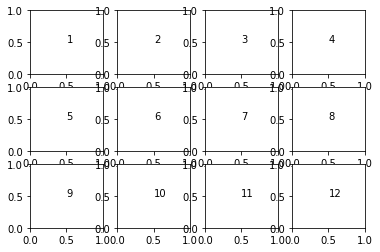

In [31]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) #set the current Axes
    plt.text(0.5, 0.5, i + 1) # print conventional subplot index number to middle of Axes
    

### Descriptive Statistics, Outliers, and Axis Limits
Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data.

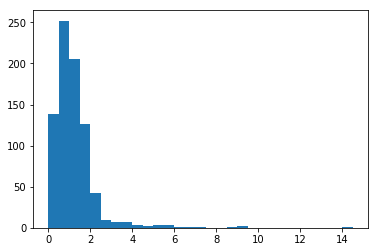

In [32]:
bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

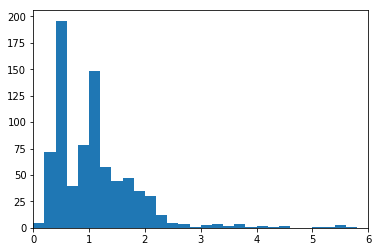

In [33]:
bins = np.arange(0, pokemon['height'].max() + 0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim(0,6);

## Scales and Transformation

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values.

Text(0.5, 0, 'log(values)')

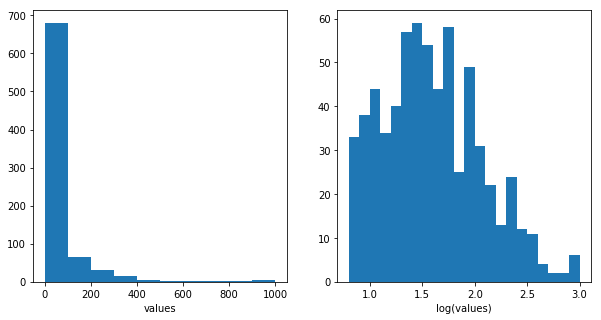

In [35]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1,2,1)
bin_edges = np.arange(0, pokemon['weight'].max()+100, 100)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted adter direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(pokemon['weight']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')

In the plot on the left, the few data points with value above 1000 mash the majority of the points into the bins on the far left. With the plot on the right, the logarithmic transform makes those large points look in line with the rest: a raw value of 1000 becomes a value of 3 under log transform, and a raw value of 100 becomes a log-transformed value of 2

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

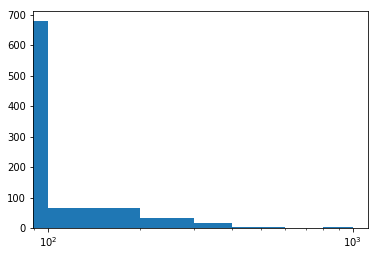

In [36]:
bin_edges = np.arange(0, pokemon['weight'].max() + 100, 100)
plt.hist(pokemon['weight'], bins = bin_edges)
plt.xscale('log')

Notice two things about the plot now. Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10.

([<matplotlib.axis.XTick at 0x1a20e6fa20>,
 <a list of 6 Text xticklabel objects>)

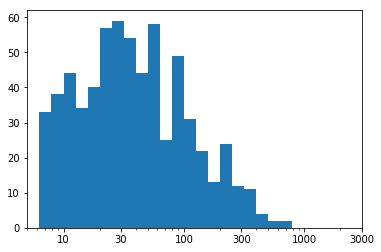

In [37]:
bin_edges = 10 ** np.arange(0.8, np.log10(pokemon['weight'].max()+0.1), 0.1)
plt.hist(pokemon['weight'], bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)

the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. 

([<matplotlib.axis.XTick at 0x1a20f1c390>,
 <a list of 5 Text xticklabel objects>)

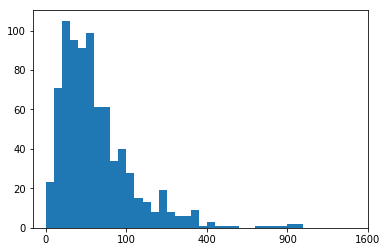

In [38]:
def sqrt_trans(x, inverse = False):
    """ transformatio helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))


## Kernel Density Estimation

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel.

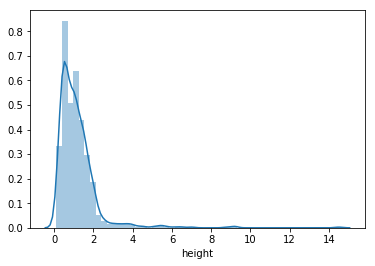

In [39]:
sb.distplot(pokemon['height'])

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot. In a rugplot, data points are depicted as dashes on a number line.

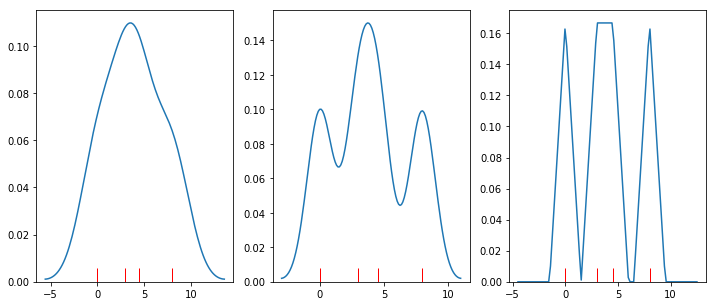

In [40]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

### Waffle Plots

One alternative univariate plot type that you might see for categorical data is the waffle plot, also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. Compared to a pie chart, it is much easier to make precise assessments of relative frequencies.

In [41]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

In [44]:
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [45]:
pokemon['generation_id'].value_counts() / pokemon.shape[0]

5    0.193309
1    0.187113
3    0.167286
4    0.132590
2    0.123916
7    0.106568
6    0.089219
Name: generation_id, dtype: float64

In [46]:
percentage_blocks(pokemon, 'generation_id')

5    19
1    18
3    16
4    17
2    19
7    10
6     8
Name: generation_id, dtype: int64

To **plot** those counts as boxex in the waffle plot form, use the __bar__ function

In [47]:
waffle_counts = percentage_blocks(pokemon, 'generation_id')
for cat in range(waffle_counts.shape[0]):
    print(cat)

0
1
2
3
4
5
6


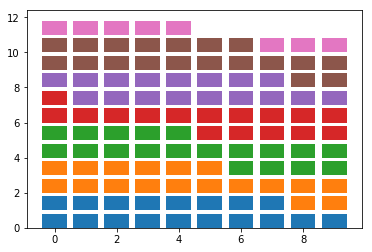

In [49]:
waffle_counts = percentage_blocks(pokemon, 'generation_id')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

(-0.8900000000000001, 11.5, 0.0, 12.39)

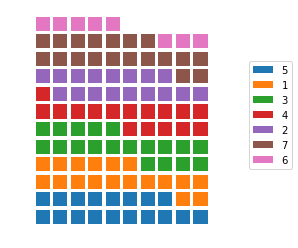

In [50]:
waffle_counts = percentage_blocks(pokemon, 'generation_id')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')

(-1.29, 18.290000000000003, 0.0, 19.580000000000002)

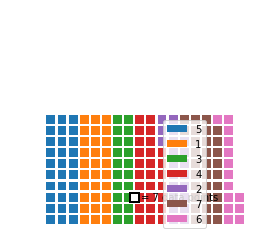

In [58]:
# each box represents seven full counts
waffle_counts = (pokemon['generation_id'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(7.5, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(8.1, 2.4,'= 7 data points', va = 'center')

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (0.8, 0.5), loc = 1)
plt.axis('off')
plt.axis('square')